<a href="https://colab.research.google.com/github/AtifQureshi110/NLP/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Naive Bayes
- Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features, class variable y and dependent feature x1 vector xn through.


- The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of p(x|y)


- In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering. They require a small amount of training data to estimate the necessary parameters.

- Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods.

- On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from predict_proba are not to be taken too seriously.

- Gaussian Naive Bayes

## DATA

In [ ]:
import pandas as pd

In [ ]:
messages_df= pd.read_csv('/content/drive/MyDrive/NLP/SMSSpamCollection.txt', sep='\t', names=["label", "message"])
messages_df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
messages_df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

## Data Processing

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

In [ ]:
wordnet=WordNetLemmatizer()
wordnet

<WordNetLemmatizer>

In [ ]:
nltk.download('punkt')# this for necessary for tokenization process
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
corpus=[]
for i in range(len(messages_df)):
    review = re.sub('[^a-zA-Z]', ' ', messages_df['message'][i]).lower().split()
    review = ' '.join([wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))])
    corpus.append(review)

In [ ]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

## BOW

In [ ]:
# Creating the BOW model
from sklearn.feature_extraction.text import CountVectorizer # BOW

In [ ]:
cv = CountVectorizer(max_features=2500) # here it use BOW
"""TfidfVectorizer is a class in scikit-learn (sklearn) that is used to convert a collection of text documents into a
matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features. """
cv

CountVectorizer(max_features=2500)

In [ ]:
"""transforms the text documents into a sparse matrix representation, where each row represents a document,
and each column represents a unique word (or token) in the corpus. The values in the matrix indicate the frequency
of each word in each document."""
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Split()

In [ ]:
y=pd.get_dummies(messages_df['label'])
y=y.iloc[:,1].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [ ]:
y.shape

(5572,)

In [ ]:
X.shape

(5572, 2500)

In [ ]:
print(X[0])

[0 0 0 ... 0 0 0]


In [ ]:
# for element in X[0]:
#     print(element)

In [ ]:
e=[]
for element in X[0]:
    if element!=0:
      e.append(element)
      print(element)
print(len(e))

1
1
1
1
1
1
1
1
1
1
1
11


In [ ]:
X.shape

(5572, 2500)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print(f"X_train: {X_train.shape}\ny_train: {y_train.shape}\nX_test: {X_test.shape}\ny_test: {y_test.shape}")

X_train: (4457, 2500)
y_train: (4457,)
X_test: (1115, 2500)
y_test: (1115,)


# Model Building and Training
- GaussianNB
- MultinomialNB
- ComplementNB
- BernoulliNB

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
model_gnb = GaussianNB()
model_mnb = MultinomialNB()
model_cnb = ComplementNB()
model_bnb = BernoulliNB()
model_catnb = CategoricalNB()

In [ ]:
spam_detect_model_gnb = model_gnb.fit(X_train, y_train)
spam_detect_model_gnb

GaussianNB()

In [ ]:
spam_detect_model_mnb = model_mnb.fit(X_train, y_train)
spam_detect_model_mnb

MultinomialNB()

In [ ]:
spam_detect_model_cnb = model_cnb.fit(X_train, y_train)
spam_detect_model_cnb

ComplementNB()

In [ ]:
spam_detect_model_bnb = model_bnb.fit(X_train, y_train)
spam_detect_model_bnb

BernoulliNB()

In [ ]:
spam_detect_model_catnb = model_catnb.fit(X_train, y_train)
spam_detect_model_catnb

CategoricalNB()

# Model Evaluation
- gnb
- mnb
- cnb
- bmb
- catnb

## - Gnb
- Continuous Feature Support: Gaussian Naive Bayes is well-suited for datasets where the features are continuous and assumed to follow a Gaussian distribution.
- Gaussian Naive Bayes is not specifically designed for text data.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report, precision_score

In [ ]:
y_pred = spam_detect_model_gnb.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=uint8)

In [ ]:
accuracy = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8681614349775785


In [ ]:
""" y_pred = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
    y_test = [1, 1, 0, 1, 0, 0, 1, 0, 0, 1]
To calculate the F1 score for each class using the default "binary" averaging method:
how you get true is are ?

Class 1 (Positive class):
True positives  (TP) = 3 in y_pred and y_test on both places 1 is present that's y acounted as 3
True Negative   (TN) = 3 in y_pred and y_test on both places 0 is present that's y acounted as 3
False positives (FP) = 2 in y_pred the array show 1  and y_test array show 0 on the same index that's y acounted as 2
False negatives (FN) = 2 in y_pred the array show 0  and y_test array show 1 on the same index that's y acounted as 2

Precision = TP / (TP + FP) = 3 / (3 + 2) = 0.6
Recall = TP / (TP + FN) = 3 / (3 + 1) = 0.75
F1 score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.6 * 0.75) / (0.6 + 0.75) = 0.6667

Class 0 (Negative class):
True positives (TP) = 2
False positives (FP) = 1
False negatives (FN) = 2

Precision = TP / (TP + FP) = 2 / (2 + 1) = 0.6667
Recall = TP / (TP + FN) = 2 / (2 + 2) = 0.5
F1 score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.6667 * 0.5) / (0.6667 + 0.5) = 0.5714
To calculate the average F1 score using the "binary" averaging method:

Average F1 score = (F1_score_positive + F1_score_negative) / 2
Substituting the values, we get:
Average F1 score = (0.6667 + 0.5714) / 2 = 0.619
Therefore, in this example, the default "binary" averaging method computes the F1 score separately for each class (Positive and Negative) and then calculates
the average F1 score. The average F1 score gives equal weight to both classes, irrespective of their support or imbalance in the dataset."""

' y_pred = [1, 0, 1, 1, 0, 0, 1, 0, 1, 0]\n    y_test = [1, 1, 0, 1, 0, 0, 1, 0, 0, 1]\nTo calculate the F1 score for each class using the default "binary" averaging method:\nhow you get true is are ?\n\nClass 1 (Positive class):\nTrue positives  (TP) = 3 in y_pred and y_test on both places 1 is present that\'s y acounted as 3\nTrue Negative   (TN) = 3 in y_pred and y_test on both places 0 is present that\'s y acounted as 3\nFalse positives (FP) = 2 in y_pred the array show 1  and y_test array show 0 on the same index that\'s y acounted as 2\nFalse negatives (FN) = 2 in y_pred the array show 0  and y_test array show 1 on the same index that\'s y acounted as 2\n\nPrecision = TP / (TP + FP) = 3 / (3 + 2) = 0.6\nRecall = TP / (TP + FN) = 3 / (3 + 1) = 0.75\nF1 score = 2 * (Precision * Recall) / (Precision + Recall) = 2 * (0.6 * 0.75) / (0.6 + 0.75) = 0.6667\n\nClass 0 (Negative class):\nTrue positives (TP) = 2\nFalse positives (FP) = 1\nFalse negatives (FN) = 2\n\nPrecision = TP / (TP + F

In [ ]:
# f1 = f1_score(y_pred, y_test)
# """By default, the f1_score function uses the "binary" averaging method,
# which computes the F1 score separately for each class and then calculates the average."""
# print(f"f1_score: {f1}")

In [ ]:
"""The "weighted" averaging method calculates the weighted average F1 score by considering the F1 score for each class and weighting it by the number of
samples in that class. This is particularly useful when dealing with imbalanced datasets, where some classes have significantly more instances than others."""

'The "weighted" averaging method calculates the weighted average F1 score by considering the F1 score for each class and weighting it by the number of \nsamples in that class. This is particularly useful when dealing with imbalanced datasets, where some classes have significantly more instances than others.'

In [ ]:
f1 = f1_score(y_pred, y_test, average="weighted")
"""The "weighted" averaging method takes into account the support (the number of true instances) for each class and calculates the weighted average based on
 the number of samples in each class. This is useful when dealing with imbalanced datasets where some classes have significantly more instances than others.
 The weighted average F1 score gives more importance to the F1 scores of classes with larger support."""
print(f"f1_score: {f1}")

f1_score: 0.8543960433032044


In [ ]:
labels = ["ham", "spam"]
cm = confusion_matrix(y_test, y_pred)
print(f"confusion_matrix: \n{cm}")

confusion_matrix: 
[[820 135]
 [ 12 148]]


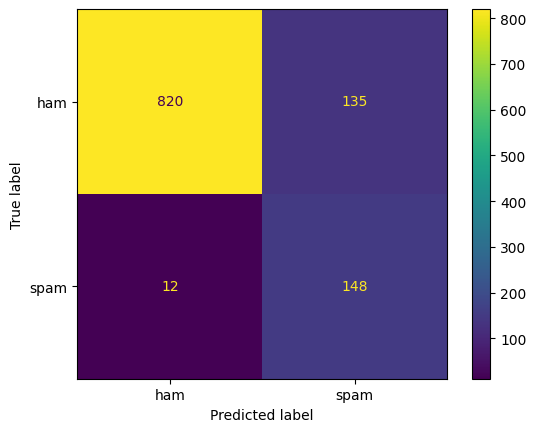

In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(f"report:{report}")

report:              precision    recall  f1-score   support

           0       0.99      0.86      0.92       955
           1       0.52      0.93      0.67       160

    accuracy                           0.87      1115
   macro avg       0.75      0.89      0.79      1115
weighted avg       0.92      0.87      0.88      1115



## - MNB
- MultinomialNB implements the naive Bayes algorithm for multinomially distributed data, and is one of the two classic naive Bayes variants used in text classification (where the data are typically represented as word vector counts, although tf-idf vectors are also known to work well in practice)

In [ ]:
y_pred = spam_detect_model_mnb.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [ ]:
accuray = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuray}")

Accuracy: 0.9829596412556054


In [ ]:
f1 = f1_score(y_pred, y_test, average="weighted")
print(f"f1_score: {f1}")

f1_score: 0.9829818917892433


In [ ]:
labels = ["ham", "spam"]
cm = confusion_matrix(y_test, y_pred)
print(f"confusion_matrix: \n{cm}")

confusion_matrix: 
[[946   9]
 [ 10 150]]


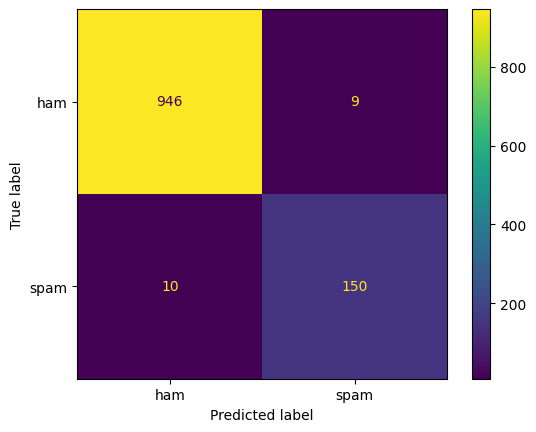

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(f"report:{report}")

report:              precision    recall  f1-score   support

           0       0.99      0.99      0.99       955
           1       0.94      0.94      0.94       160

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



## - Cnb
- ComplementNB implements the complement naive Bayes (CNB) algorithm. CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularly suited for imbalanced data sets.

- Specifically, CNB uses statistics from the complement of each class to compute the model’s weights.

- The inventors of CNB show empirically that the parameter estimates for CNB are more stable than those for MNB.

- Adaptation of Multinomial Naive Bayes: CNB is an adaptation of the Multinomial Naive Bayes algorithm. It retains the simplicity and efficiency of the underlying Naive Bayes approach but introduces modifications that enhance its performance on imbalanced datasets. CNB builds upon the strengths of MNB and addresses its limitations in imbalanced scenarios

- Broad Applicability: While CNB has shown excellent performance on text classification tasks, it is not limited to text data. It can be applied to other domains and datasets as well, especially when dealing with imbalanced class distributions. Its generalization beyond text classification makes it a versatile algorithm in various machine learning applications.

In [ ]:
y_pred = spam_detect_model_cnb.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [ ]:
accuray = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuray}")

Accuracy: 0.9426008968609866


In [ ]:
f1 = f1_score(y_pred, y_test, average="weighted")
print(f"f1_score: {f1}")

f1_score: 0.9395973151551414


In [ ]:
labels = ["ham", "spam"]
cm = confusion_matrix(y_test, y_pred)
print(f"confusion_matrix: \n{cm}")

confusion_matrix: 
[[899  56]
 [  8 152]]


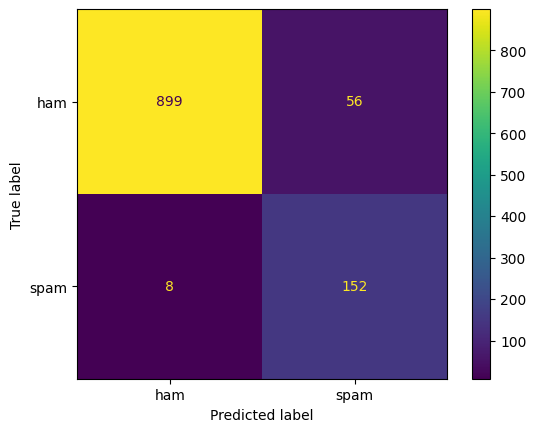

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(f"report:{report}")

report:              precision    recall  f1-score   support

           0       0.99      0.94      0.97       955
           1       0.73      0.95      0.83       160

    accuracy                           0.94      1115
   macro avg       0.86      0.95      0.90      1115
weighted avg       0.95      0.94      0.95      1115



## - Bnb
- BernoulliNB implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions; i.e., there may be multiple features but each one is assumed to be a binary-valued (Bernoulli, boolean) variable. Therefore, this class requires samples to be represented as binary-valued feature vectors; if handed any other kind of data, a BernoulliNB instance may binarize its input (depending on the binarize parameter).

- **Bernoulli Naive Bayes is commonly used in text mining and document classification tasks, where binary features such as the presence or absence of words are used to classify documents into different categories. It can also be applied to other domains where the features can be represented as binary variables.**

- **It's important to note that Bernoulli Naive Bayes may not be suitable for datasets with continuous or categorical features that do not follow a binary distribution. In such cases, other Naive Bayes variants like GaussianNB (for continuous features) or MultinomialNB (for discrete features) may be more appropriate.**

- In the case of text classification, word occurrence vectors (rather than word count vectors) may be used to train and use this classifier. BernoulliNB might perform better on some datasets, especially those with shorter documents. It is advisable to evaluate both models, if time permits.

In [ ]:
y_pred = spam_detect_model_bnb.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [ ]:
accuray = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuray}")

Accuracy: 0.9811659192825112


In [ ]:
f1 = f1_score(y_pred, y_test, average="weighted")
print(f"f1_score: {f1}")

f1_score: 0.9813942727558531


In [ ]:
labels = ["ham", "spam"]
cm = confusion_matrix(y_test, y_pred)
print(f"confusion_matrix: \n{cm}")

confusion_matrix: 
[[949   6]
 [ 15 145]]


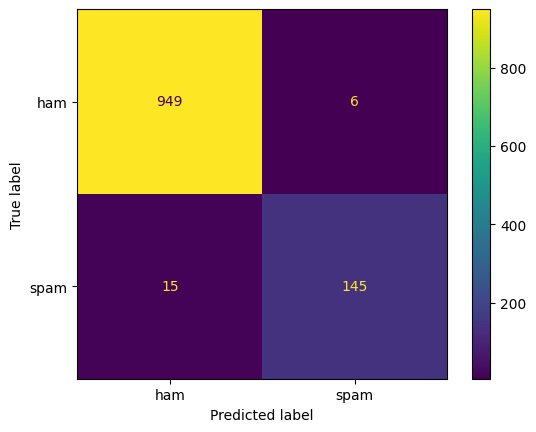

In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(f"report:{report}")

report:              precision    recall  f1-score   support

           0       0.98      0.99      0.99       955
           1       0.96      0.91      0.93       160

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



## - CatNB
- CategoricalNB implements the categorical naive Bayes algorithm for categorically distributed data. It assumes that each feature, which is described by the index , has its own categorical distribution.

- Categorical Naive Bayes is useful when working with datasets where the features are categorical variables, such as text classification tasks with **word categories** or sentiment analysis with sentiment labels. It provides a probabilistic framework to handle categorically distributed data and make predictions based on the principles of Naive Bayes.

- It's worth noting that there are other specialized algorithms for handling categorical data, such as decision trees, random forests, and gradient boosting machines, which can also be effective in modeling and predicting with categorical features.

In [ ]:
y_pred = spam_detect_model_catnb.predict(X_test)
y_pred

In [ ]:
accuray = accuracy_score(y_pred, y_test)
print(f"Accuracy: {accuray}")

In [ ]:
f1 = f1_score(y_pred, y_test, average="weighted")
print(f"f1_score: {f1}")

In [ ]:
labels = ["ham", "spam"]
cm = confusion_matrix(y_test, y_pred)
print(f"confusion_matrix: \n{cm}")

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print(f"report:{report}")

# Summary
- by the above theory of different algorithms of **Naive Bayes** we knew that **Gaussian Naive Bayes** is the least significant algorithm on text data among **Naive Bayes** algotithms.
- meanwhile **Multinomial Naive Bayes** and **Bernoulli Naive Bayes** are highly recommended for text data however **Complement Naive Bayes** and **Categorical Naive Bayes** are also give good results but could not beat **Multinomial Naive Bayes** and **Bernoulli Naive Bayes**
- **Here we try to proof that is it true or not**

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy,precision, f1
train_classifier(model_gnb ,X_train,y_train,X_test,y_test)

(0.8681614349775785, 0.5229681978798587, 0.6681715575620769)

In [ ]:
train_classifier(model_mnb ,X_train,y_train,X_test,y_test)

(0.9829596412556054, 0.9433962264150944, 0.9404388714733543)

In [ ]:
train_classifier(model_cnb,X_train,y_train,X_test,y_test)

(0.9426008968609866, 0.7307692307692307, 0.8260869565217392)

In [ ]:
train_classifier(model_bnb,X_train,y_train,X_test,y_test)

(0.9811659192825112, 0.9602649006622517, 0.932475884244373)

In [ ]:
accuracy_scores = []
precision_scores = []
f1_scores = []
clfs = {    "GaussianNB":model_gnb,
     "MultinomialNB":model_mnb,
     "ComplementN":model_cnb,
     "BernoulliNB":model_bnb  }

for name,clf in clfs.items():

    current_accuracy,current_precision,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("f1 - ", current_f1)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)

For  GaussianNB
Accuracy -  0.8681614349775785
Precision -  0.5229681978798587
f1 -  0.6681715575620769
For  MultinomialNB
Accuracy -  0.9829596412556054
Precision -  0.9433962264150944
f1 -  0.9404388714733543
For  ComplementN
Accuracy -  0.9426008968609866
Precision -  0.7307692307692307
f1 -  0.8260869565217392
For  BernoulliNB
Accuracy -  0.9811659192825112
Precision -  0.9602649006622517
f1 -  0.932475884244373


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores, 'F1':f1_scores}).sort_values('Precision',ascending=False)
#accuracy_score, precision_score are lists
performance_df
# RF and SVC have high accuracy than NB but due to imbalance data NB has more value than other b/c precision is alsi high.

,Algorithm,Accuracy,Precision,F1
3,BernoulliNB,0.981166,0.960265,0.932476
1,MultinomialNB,0.982960,0.943396,0.940439
2,ComplementN,0.942601,0.730769,0.826087
0,GaussianNB,0.868161,0.522968,0.668172


# Advantages gnb
- It is not only a simple approach but also a fast and accurate method for prediction.
- Naive Bayes has a very low computation cost.
- It can efficiently work on a large dataset.
- It performs well in case of discrete response variable compared to the continuous variable.
- It can be used with multiple class prediction problems.
- It also performs well in the case of text analytics problems.
When the assumption of independence holds, a Naive Bayes classifier performs better compared to other models like logistic regression.
# Disadvantages gnb
- The assumption of independent features. In practice, it is almost impossible that model will get a set of predictors which are entirely independent.
- If there is no training tuple of a particular class, this causes zero posterior probability. In this case, the model is unable to make predictions. This problem is known as Zero Probability/Frequency Problem.